In [99]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import copy
from matplotlib import pylab as plt
import cv2
%matplotlib inline


In [2]:
start = (0,0)
finish = (10,10)
points = np.array([(3,6),(7,9),(0,6),(3,7),(8,5),(2,6),(5,5),(1,4),(1,9),(8,2),(5,2)])
m = (start,finish,points)
all_points = np.concatenate(([start],points,[finish]))

In [3]:
#vibor 1 4- 17
start = [1029, -1086,1,4]
points = np.array([(1414, -1135),(947, -1404),(1272, -1403),(1598, -1372),(1937, -1442),(1126, -1721),(1484, -1649),(1298, -2003),(1624, -1804),(1814, -1781),(1672, -2133),(1936, -2014)])
points = np.hstack([points,np.array([(1,5+i) for i in range(points.shape[0])]) ])
finish = [2135, -1708,1,17]

In [69]:
#vibor sk-28
start = [771, 270,1,'sk']
points = np.array([(609, 842),(930, 752),(1375, 664),(316, 1228),(717, 1348),(959, 1020),(1351, 1086),(1268, 1245),(1047, 1518)])
points = np.hstack([points,np.array([(1,19+i) for i in range(points.shape[0])]) ])
finish = [1145, 1943,1,'28']
all_points = f1 = np.concatenate(([start],points,[finish]))

In [28]:
#vibor 40-53

start = [138, -120,1,"40"]
all_points = np.array([[271, -902, 1, "41"], [544, -585, 1, "42"], [710, -402, 1, "43"], [1080, -263, 1, "44"], [505, -1290, 1, "45"], [654, -960, 1, "46"], [893, -706, 1, "47"], [1164, -593, 1, "48"], [890, -1243, 1, "49"], [1171, -940, 1, "50"], [1124, -1529, 1, "51"], [1368, -1214, 1, "52"]])
finish = [1540, -1694,1,"53"]
factor = 0.003401360544217687

In [79]:
#vibor 3 32 - pf
start = [1814, 1332, 1, "32"]
points =  np.array([[1490, 1476, 1, "33"], [1612, 1739, 1, "35"], [1210, 1493, 1, "35'"], [946, 1637, 1, "36"], [1606, 2043, 1, "36'"], [1098, 1922, 1, "34"], [1268, 2034, 1, "34'"], [1290, 2284, 1, "37"], [868, 2030, 1, "37'"]])
finish = [574, 1902, 1, "pf"]
all_points = f1 = np.concatenate(([start],points,[finish]))

In [3]:
def getArrayFromPoint(points,text_name):
    return points[points.text_digits==text_name][['x','y','radius','text_digits']].iloc[0].values
def getArrayFromPoints(points):
    return points[['x','y','radius','text_digits']].values

In [4]:
def view_route(route):
    return points[route][:,3]

In [5]:
def route_dist(route):
    dist = start_distances[route[0]]
    for p1,p2 in zip(route[:-1],route[1:]):
        dist += distance_matrix[p1,p2]
    return dist + finish_distances[route[-1]]

def distance(x,y):
    return np.sqrt((float(x[0])-float(y[0]))**2  + (float(x[1])-float(y[1]))**2)

def register_top(route,dist):
    global top
    global routes_to_find
    global porog
    top.append((points[route],dist))
    top = sorted(top,key = lambda x: x[1])[:routes_to_find]
    #print 'new top'
    try:
        last = top[routes_to_find-1]
        #print 'porog changed'
        porog = last[1]
    except:
        pass
    
def best_route(route,dist):
    current = route[-1]
    if dist+porog_adjust[len(points)-len(route)] > porog:
        return
    if dist+finish_distances[current]>porog:
        return
    if len(route) == len(points):
        register_top(route,dist+finish_distances[current])
        return
    points_walked = 0
    if len(route)==4:
        print (points[route][:,3], top[0][1] if len(top)> 0 else 2000000000 )
    for i in sorted_by_distance_points[current]:
        if i in route:
            continue
        new_route = copy.copy(route)
        new_route.append(i)
        new_dist = dist+distance_matrix[current,i]
        if new_dist>porog:
            continue
        best = best_route(new_route,new_dist)
        points_walked+=1
        if points_walked == nearest_points:
            break

In [6]:
ls maps/2019o

1v.png      1v.png.dat  2v.png      2v.png.dat  3v.png      3v.png.dat


In [7]:
points

NameError: name 'points' is not defined

In [100]:
start_name = '6'
finish_name = 'SK'
kp_in = '6-22'
dat_filename = 'maps/2019o/1v.png.dat'
map_filename = 'maps/2019o/1v.png'
cv2.imread(map_filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

NameError: name 'img' is not defined

In [53]:
def kp_gen(kp_str):
    kp_strs = kp_str.split(',')
    for s in kp_strs:
        if '-' in s:
            v = s.split('-')
            min_s = int(v[0])
            max_s = int(v[1])
            for i in range(min_s,max_s+1,1):
                yield str(i)
        else:
            yield s

In [68]:
#инициализация. Нужно также указать начало и конец выбора

points = pd.read_csv(dat_filename,header=0)
start = getArrayFromPoint(points,start_name)
finish = getArrayFromPoint(points,finish_name)
kps = list(kp_gen(kp_in))
points = points[points.text_digits.isin(kps)]
points = getArrayFromPoints(points)
all_points = np.concatenate(([start],points,[finish]))


In [71]:
a = np.array([6,5,8,7,11,10,12,15,16,13,14,9])
a = a-5
points[a]
x = route_dist(a)

In [93]:
### params
routes_to_find = 10
top = []
porog = 1e20
nearest_points = 6

In [91]:
#prepare data
start_distances = np.array([distance(start,x) for x in points])
points = points[start_distances.argsort()]
start_distances = np.array([distance(start,x) for x in points])
distance_matrix = np.array([[distance(x,y) for x in points] for y in points])
finish_distances = np.array([distance(finish,x) for x in points])
sorted_by_distance_points = [distance_matrix[i].argsort() for i in range(len(points))]

nearest_peregons = distance_matrix.flatten()
nearest_peregons = nearest_peregons[nearest_peregons!=0]
nearest_peregons.sort()
nearest_peregons = nearest_peregons[::2]
nearest_peregons = nearest_peregons.cumsum()

porog_adjust = np.hstack([np.array([finish_distances.min()]), nearest_peregons+finish_distances.min()])

In [96]:
#real work here
top = []
porog=1e20
for first in (range(len(points))):
    b = best_route([first],start_distances[first])

['6' '8' '9' '7'] 2000000000
['6' '8' '9' '10'] 6655.646457306754
['6' '8' '9' '14'] 6655.646457306754
['6' '8' '9' '13'] 6655.646457306754
['6' '8' '9' '11'] 6655.646457306754
['6' '8' '9' '15'] 6655.646457306754
['6' '8' '13' '12'] 6655.646457306754
['6' '8' '13' '17'] 6655.646457306754
['6' '8' '13' '9'] 6655.646457306754
['6' '8' '13' '14'] 6655.646457306754
['6' '8' '13' '16'] 6655.646457306754
['6' '8' '13' '10'] 6655.646457306754
['6' '8' '12' '13'] 6655.646457306754
['6' '8' '12' '16'] 6655.646457306754
['6' '8' '12' '17'] 6655.646457306754
['6' '8' '12' '9'] 6655.646457306754
['6' '8' '12' '19'] 6655.646457306754
['6' '8' '7' '9'] 6655.646457306754
['6' '8' '7' '10'] 6655.646457306754
['6' '8' '7' '11'] 6655.646457306754
['6' '8' '7' '14'] 6655.646457306754
['6' '8' '10' '11'] 6655.646457306754
['6' '8' '10' '14'] 6655.646457306754
['6' '8' '10' '15'] 6655.646457306754
['6' '8' '10' '9'] 6655.646457306754
['6' '8' '10' '7'] 6655.646457306754
['6' '8' '14' '15'] 6655.6464573067

In [97]:
[(x[0][:,3],x[1]*factor) for x in top]

[(array(['6', '8', '9', '7', '11', '10', '14', '15', '18', '17', '13', '12',
         '16', '19', '20', '21', '22'], dtype=object), 16.978689942109067),
 (array(['6', '8', '9', '7', '11', '10', '14', '15', '18', '21', '22', '20',
         '17', '13', '12', '16', '19'], dtype=object), 16.990605454792213),
 (array(['6', '8', '9', '7', '10', '11', '15', '14', '18', '17', '13', '12',
         '16', '19', '20', '21', '22'], dtype=object), 17.05394737732895),
 (array(['6', '8', '9', '7', '10', '11', '15', '14', '18', '21', '22', '20',
         '17', '13', '12', '16', '19'], dtype=object), 17.065862890012095),
 (array(['6', '8', '9', '7', '11', '10', '15', '14', '18', '17', '13', '12',
         '16', '19', '20', '21', '22'], dtype=object), 17.077018076077227),
 (array(['6', '8', '9', '7', '11', '10', '15', '14', '18', '21', '22', '20',
         '17', '13', '12', '16', '19'], dtype=object), 17.088933588760376),
 (array(['6', '8', '9', '7', '10', '11', '15', '14', '13', '12', '16', '17',
      

In [77]:
factor = 0.003401360544217687 * 300/400

In [99]:
np.array([1,2,3])

array([1, 2, 3])

In [94]:
best = top[0][1]
for t in top:
    print (np.concatenate([[start],t[0].astype(int),[finish]])[:,3],\
        '%.3f км'%(t[1]*factor),\
        '(-%.3f,'%((t[1]-best)*factor),\
        '%.2f%%)' % ((t[1]-best)*100./best))

IndexError: list index out of range

In [118]:
def get_point_by_name(name):
    name = int(name)
    return all_points[all_points[:,3]==name][0]

In [123]:
def calculate_route(route_str):
    route = route_str.split('-')
    res = 0
    for x,y in zip(route[:-1],route[1:]):
        x = get_point_by_name(x)
        y = get_point_by_name(y)
        res += distance(x,y)
    return res*factor

In [124]:
calculate_route('6-8-9') - calculate_route('6-9')

0.8245059647962375

In [125]:
calculate_route('12-8-7') - calculate_route('12-7')

0.9227184033350069

In [ ]:
calulate_route('')

In [100]:
distance_matrix

array([[   0.        ,  296.04222672,  259.62472918,  246.67590073,
         300.1666204 ,  525.40460599,  429.21439864,  493.32545039,
         539.10295863,  548.94261995,  746.        ,  647.78082713,
         714.42564344,  783.48516259,  928.06734669,  874.76225342,
        1054.43823906, 1130.37029331, 1156.86645729],
       [ 296.04222672,    0.        ,  555.15223137,  342.26597844,
         539.79347903,  273.65854637,  308.10387859,  491.4804167 ,
         833.75116192,  777.49147905,  568.85586927,  736.29953144,
         866.92617909,  785.75441456,  829.9843372 , 1135.19866103,
        1228.59960931, 1106.72309093, 1224.84815385],
       [ 259.62472918,  555.15223137,    0.        ,  407.94607487,
         261.81100053,  777.51205778,  648.08178496,  640.2725982 ,
         289.98103386,  445.9024557 ,  962.79021599,  696.71873809,
         688.08793043,  888.36478994, 1092.02930364,  687.72814396,
         974.3536319 , 1231.82222743, 1179.96144005],
       [ 246.67590073,

In [ ]:
#1 - [ 6, 10, 12, 15, 16, 14, 13, 11,  7,  5,  8,  9]
#2 - [19, 22, 23, 24, 20, 21, 25, 26, 27]
#3 - [(]33 35 36' 37 34' 34 35' 36 37']
#4 - [42 43 44 48 47 46 41 45 49 51]

In [32]:
def plot(route):
    f1 = np.concatenate(([start],points[route]))
    f2 = np.concatenate((points[route],[finish]))
    for p1,p2 in zip(f1,f2):
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]])

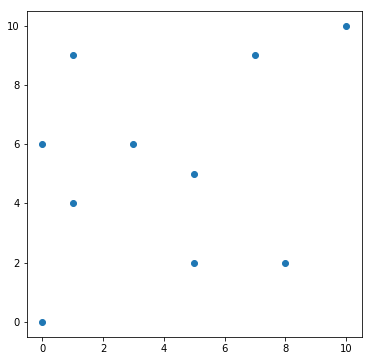

In [184]:
plt.figure(figsize=(6,6))
plt.scatter(all_points[:,0],all_points[:,1])

([1, 5, 7, 10, 11, 9, 8, 6, 2, 0, 3, 4], 3977.3915758864823)
([0, 2, 1, 5, 7, 10, 11, 9, 8, 6, 3, 4], 4036.8501752290699)


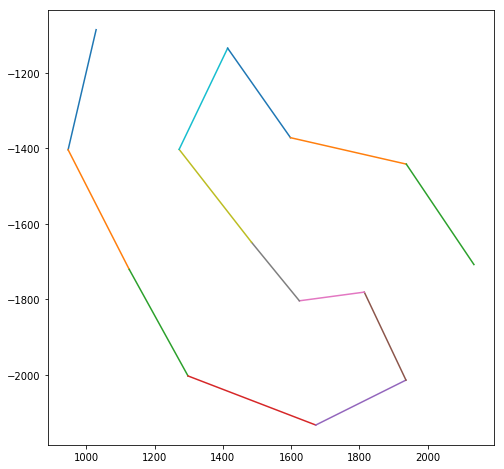

In [34]:
plt.figure(figsize=(8,8))

print top[0]
print top[1]
plot(top[0][0])
#print np.array(best[0]) + 19

In [ ]:
(33 35 36' 37 34' 34 35' 36 37')

# Для КП, которые можно пропустить

In [8]:
import itertools

In [41]:
all_best = []
top = []
porog=1e20
routes_to_find = 10

for combination in tqdm_notebook(itertools.combinations(range(1,12,1),9),total=55):
    points_ind = np.concatenate(([0],combination))
    points = all_points[points_ind]
    distance_matrix = np.array([[distance(x,y) for x in points] for y in points])
    start_distances = np.array([distance(start,x) for x in points])
    finish_distances = np.array([distance(finish,x) for x in points])
    for first in range(len(points)):
        b = best_route([first],start_distances[first])   
    
#print top

HBox(children=(IntProgress(value=0, max=55), HTML(value=u'')))

In [46]:
best = top[0][1]
for t in top:
    print np.concatenate([[start],t[0],[finish]])[:,3],\
        (list(set(all_points[:,3]) - set(t[0][:,3]))),\
        '%.3f км'%(t[1]*factor),\
        '(-%.3f,'%((t[1]-best)*factor),\
        '%.2f%%)' % ((t[1]-best)*100./best)

['40' '42' '43' '44' '48' '47' '46' '41' '45' '49' '51' '53'] ['50', '52'] 14.585 км (-0.000, 0.00%)
['40' '43' '42' '41' '45' '46' '47' '48' '50' '52' '51' '53'] ['44', '49'] 14.596 км (-0.011, 0.08%)
['40' '43' '42' '41' '46' '47' '48' '50' '52' '49' '51' '53'] ['44', '45'] 14.671 км (-0.087, 0.59%)
['40' '43' '42' '41' '45' '46' '47' '48' '50' '49' '51' '53'] ['44', '52'] 14.755 км (-0.171, 1.17%)
['40' '43' '42' '41' '45' '49' '46' '47' '48' '50' '52' '53'] ['44', '51'] 14.794 км (-0.209, 1.43%)
['40' '43' '42' '41' '46' '47' '48' '50' '49' '51' '52' '53'] ['44', '45'] 14.868 км (-0.283, 1.94%)
['40' '43' '42' '41' '46' '47' '44' '48' '50' '52' '51' '53'] ['45', '49'] 14.936 км (-0.351, 2.41%)
['40' '42' '41' '46' '47' '43' '44' '48' '50' '52' '51' '53'] ['45', '49'] 14.942 км (-0.357, 2.45%)
['40' '42' '43' '47' '46' '41' '45' '49' '50' '52' '51' '53'] ['44', '48'] 14.942 км (-0.357, 2.45%)
['40' '41' '46' '42' '43' '44' '48' '47' '50' '52' '51' '53'] ['45', '49'] 14.948 км (-0.36

In [14]:
for t in top:
    print t[0][:,3],t[1]*factor

['41' '46' '42' '43' '44' '48' '47' '50' '52' '51'] 14.9478693608
['41' '42' '43' '44' '48' '47' '46' '45' '49' '51'] 14.9789095237
['41' '46' '47' '42' '43' '44' '48' '50' '52' '51'] 15.0071454921
['41' '45' '46' '42' '43' '47' '48' '50' '52' '51'] 15.0518479546
['41' '42' '43' '44' '48' '50' '47' '46' '49' '51'] 15.0992547968
['41' '46' '42' '43' '44' '48' '47' '50' '49' '51'] 15.1072433171
['41' '46' '42' '43' '47' '48' '50' '52' '49' '51'] 15.1271802326
